In [68]:
import os
import cv2
import pandas as pd
import numpy as np

from keras.layers import Dense,Flatten,MaxPooling2D,Convolution2D,Dropout,GlobalAveragePooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator



import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, precision_score

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
Class_names = []
mypath = '/content/drive/My Drive/Dataset_for_train'
for (dirpath, dirnames, filenames) in os.walk(mypath):
    Class_names.extend(dirnames)
    break

In [71]:
Class_names

['Aadhaar_front',
 'Aadhaar_back',
 'driving_license_front',
 'driving_license_back',
 'passport_front',
 'passport_back',
 'Voter_id_back',
 'Voter_id_front',
 'Pan',
 'train',
 'val',
 'API response',
 'Pan1',
 'Pan2',
 'Pan3']

In [72]:
from os import walk
directory='/content/drive/My Drive/Dataset_for_train'
categories=['Voter_id_back','Voter_id_front','Pan','Aadhaar_front','driving_license_front','passport_front','Aadhaar_back','passport_back','driving_license_back']
X = []
Y = []
Count=[]
for category in categories:
  path = os.path.join(directory,category)
  count= 0
  for img in os.listdir(path):
    count+=1
  Count.append(count)

In [73]:
temp=[]
for i in (Count):
  temp.append(1500//i)

In [74]:
import os
from os import walk
directory='/content/drive/My Drive/Dataset_for_train'
categories=['Voter_id_back','Voter_id_front','Pan','Aadhaar_front','driving_license_front','passport_front','Aadhaar_back','passport_back','driving_license_back']

X_test = []
y_test = []
X = []
Y = []
i = -1
j=0
df = pd.DataFrame()
for category in categories:
  path = os.path.join(directory,category)
  i+=1
  for img in os.listdir(path):
    try:
      j+=1
      image = (cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE))
      image = cv2.resize(image,(224,224))                     
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      if j%5==0:
        X_test.append(image)
        y_test.append(category)
      else:
        X.append(image)
        Y.append(category)
        sample_image = expand_dims(image, 0)
        datagenertor = ImageDataGenerator(brightness_range=[0.1,1.0],height_shift_range=0.5,rotation_range=40,zoom_range=0.2)
        iterator = datagenertor.flow(sample_image, batch_size=1)
        for k in range(temp[i]):
          batch = iterator.next()
          image = batch[0].astype('uint8')
          X.append(cv2.resize(image,(224,224)))
          Y.append(category)  
    except:
      continue

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of the classes')

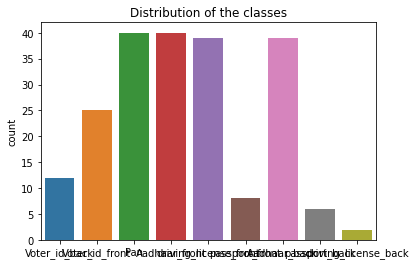

In [75]:
sns.countplot(y_test)
plt.title("Distribution of the classes")

In [76]:
print("Total number of Records",len(Y))
for i in categories:
  print("Total number of",i," ",Y.count(i))

Total number of Records 11211
Total number of Voter_id_back   1248
Total number of Voter_id_front   1224
Total number of Pan   1280
Total number of Aadhaar_front   1280
Total number of driving_license_front   1256
Total number of passport_front   1200
Total number of Aadhaar_back   1248
Total number of passport_back   1242
Total number of driving_license_back   1233


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of the classes')

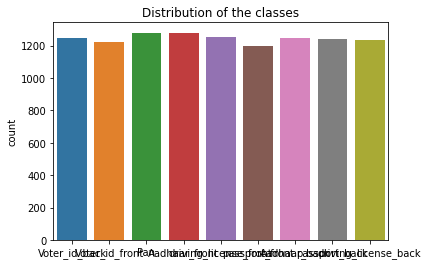

In [77]:
sns.countplot(Y)
plt.title("Distribution of the classes")

In [78]:
from keras.utils import np_utils
import pickle
X = np.array(X)
le_ = LabelEncoder()
Y = (le_.fit_transform(Y))

output = open('encoder.pkl', 'wb')
pickle.dump(le_, output)
output.close()

Y= np_utils.to_categorical(Y)

In [79]:
from keras.utils import np_utils
X_test = np.array(X_test)
le_ = LabelEncoder()
y_test = (le_.fit_transform(y_test))
y_test= np_utils.to_categorical(y_test)

In [80]:
from keras.applications.vgg16  import VGG16
from keras.models import Sequential, load_model, Model

img_height,img_width = 224,224          ## default input size
num_classes = 9                     ## Total Classes

base_model = VGG16(weights='imagenet', include_top=False, input_shape= (img_height,img_width,3))

## Final dense layers
x = base_model.output           ## getting features
x = GlobalAveragePooling2D()(x) ## Average Pooling
x = Dropout(0.3)(x)             ## Dropout

## Final softmax layer
predictions = Dense(num_classes, activation= 'softmax')(x)  
model = Model(inputs = base_model.input, outputs = predictions)

# compiling the model
adam = Adam(lr=1e-5, decay=1e-6)
model.compile(adam, 'categorical_crossentropy', metrics=['accuracy'])

In [81]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X,Y,stratify=Y,test_size=0.3)

In [83]:
early_stopping = EarlyStopping(patience=5, verbose=1,restore_best_weights=True)

In [84]:
history = model.fit(X_train, y_train,batch_size=40,epochs=50, callbacks=[early_stopping], validation_data=(X_val,y_val))

Epoch 1/50
197/197 [==============================] - 118s 597ms/step - loss: 1.6333 - accuracy: 0.4483 - val_loss: 0.5219 - val_accuracy: 0.8737
Epoch 2/50
197/197 [==============================] - 116s 591ms/step - loss: 0.4120 - accuracy: 0.8824 - val_loss: 0.1851 - val_accuracy: 0.9560
Epoch 3/50
197/197 [==============================] - 116s 591ms/step - loss: 0.1946 - accuracy: 0.9479 - val_loss: 0.1191 - val_accuracy: 0.9721
Epoch 4/50
197/197 [==============================] - 116s 591ms/step - loss: 0.1131 - accuracy: 0.9698 - val_loss: 0.0686 - val_accuracy: 0.9813
Epoch 5/50
197/197 [==============================] - 116s 591ms/step - loss: 0.0706 - accuracy: 0.9827 - val_loss: 0.1184 - val_accuracy: 0.9724
Epoch 6/50
197/197 [==============================] - 116s 591ms/step - loss: 0.0582 - accuracy: 0.9843 - val_loss: 0.0533 - val_accuracy: 0.9869
Epoch 7/50
197/197 [==============================] - 116s 591ms/step - loss: 0.0528 - accuracy: 0.9853 - val_loss: 0.0393 -

In [85]:
model.save('/content/drive/My Drive/Dataset_for_train/KYC_Vgg_transfer_learning.h5')

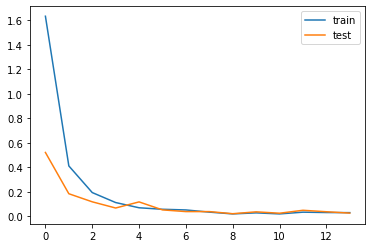

In [86]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

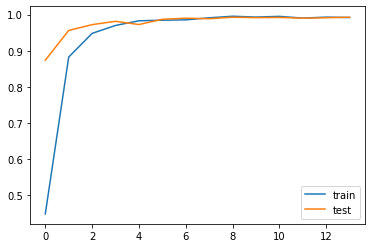

In [87]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

In [88]:
preds=model.predict(X_test, verbose=1)

7/7 [==============================] - 1s 114ms/step


In [89]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)

In [90]:
acc

0.9620853066444397

In [91]:
result = [list(np.where(i == np.amax(i))[0]+1)[0] for i in preds]

In [92]:
y_test =[list(np.where(i == np.amax(i))[0]+1)[0] for i in y_test]

In [93]:
print("The accuracy is:",acc)
print("The Precison score is:",precision_score(result,y_test,average='micro'))
print("The Recall score is:",recall_score(result,y_test,average='micro'))
print("F-Measure is:",(2*precision_score(result,y_test,average='micro')*recall_score(result,y_test,average='micro'))/(recall_score(result,y_test,average='micro')+precision_score(result,y_test,average='micro')))

The accuracy is: 0.9620853066444397
The Precison score is: 0.9620853080568721
The Recall score is: 0.9620853080568721
F-Measure is: 0.9620853080568721


In [94]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(result,y_test) 
print(results) 

[[37  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0]
 [ 1  0  0  0 24  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 1  0  2  0  1  2 38  0  0]
 [ 0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  0  0  0  0  8]]
